In [1]:
# import liabrary

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# import dataset

df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# drop unnecessary column

df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df.shape

(200, 4)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# Check missing values
print(f"Missing values in each variable:\n{df.isnull().sum()}")

Missing values in each variable:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There have no missing value

In [7]:
# Let's check if there is any duplicate rows or not.
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


### Now we need to check the data type of each every feature in the Dataframe. Because K-means is based on distance for this reason categorical data can not be handled directly, so this type of data  must be converted into int or float data type.

In [8]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Here Gender variable is categorical variable so it must be converted into int or float

In [9]:
#df['Gender'] = df['Gender'].apply(lambda x: 1 if x== 'Male' else 0)

In [10]:
print(f"Variable:\t\t  Type:\n\n{df.dtypes}")

Variable:		  Type:

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


<Axes: >

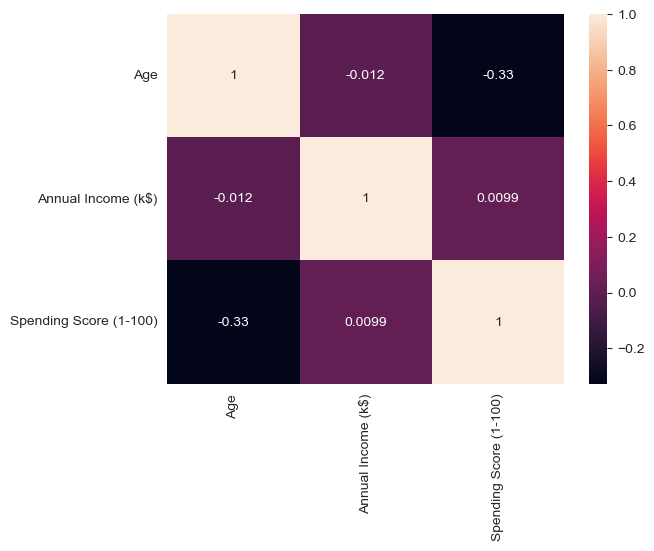

In [12]:
sns.heatmap(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr() , annot=True)

The figuer above shows that there have high correlation between Age and Spending Score (1-100) than others

In [13]:
df.groupby("Gender")[['Annual Income (k$)']].sum().reset_index()

,Gender,Annual Income (k$)
0,Female,6636
1,Male,5476


The average annual income of females is higher compared to males.

### A bar plot  is made to check the distribution of male and female population in the dataset.

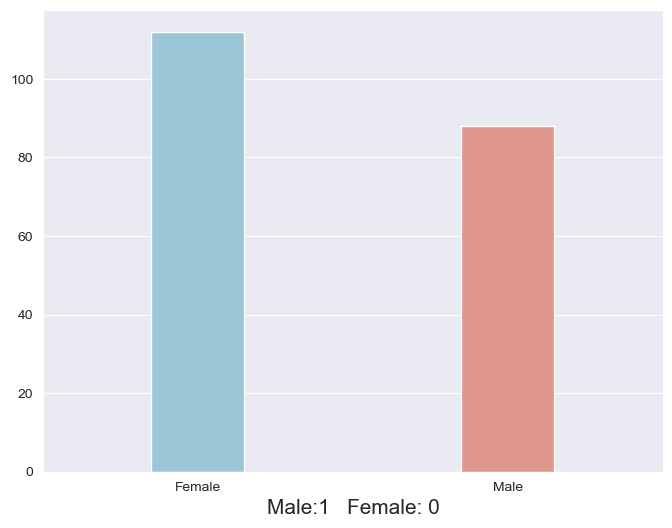

In [14]:
genders = df.Gender.value_counts()
X= genders.index
Y= genders.values
plt.figure(figsize=(8,6))
color=['skyblue', 'salmon']
sns.barplot(x=X, y=Y, width =.3, saturation=0.6, palette= color)
plt.xlabel("Male:1   Female: 0", fontsize=15 )
plt.show()

The amount of female population clearly outweighs the male population

### Next I ploted a bar plot to check the distribution of number of customers in each age group.

In [16]:

df.groupby("Age").sum()[['Annual Income (k$)']].reset_index()

,Age,Annual Income (k$)
0,18,205
1,19,456
2,20,208
3,21,194
4,22,94
5,23,249
6,24,157
7,25,173
8,26,116
9,27,379


### Which range of Age have customer more? 

In [17]:
df.Age.min()

18

In [18]:
df.Age.max()

70

In [19]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [20]:
df['Age'].describe()[0]

200.0

In [21]:
def range_of_age(df):
    age_18_27 = df.Age[(df.Age <= 27) & (df.Age >= 18)]
    age_28_37 = df.Age[(df.Age <= 37) & (df.Age >= 28)]
    age_38_47 = df.Age[(df.Age <= 47) & (df.Age >= 38)]
    age_48_57 = df.Age[(df.Age <= 57) & (df.Age >= 48)]
    age_58_above = df.Age[df.Age >= 58]
    
    total_count = df['Age'].describe()[0]
    percentage_18_27 = (len(age_18_27) / total_count) * 100
    percentage_28_37 = (len(age_28_37) / total_count) * 100
    percentage_38_47 = (len(age_38_47) / total_count) * 100
    percentage_48_57 = (len(age_48_57) / total_count) * 100
    percentage_58_above = (len(age_58_above) / total_count) * 100
    
    return (len(age_18_27), percentage_18_27), (len(age_28_37), percentage_28_37), \
           (len(age_38_47), percentage_38_47), (len(age_48_57), percentage_48_57), \
           (len(age_58_above), percentage_58_above)

age_18_27, age_28_37, age_38_47, age_48_57, age_58_above = range_of_age(df)

print("The number of customer from 18 to 27 : ", age_18_27[0], " (", age_18_27[1], "%)",
     "\nThe number of customer from 28 to 37 : ", age_28_37[0], " (", age_28_37[1], "%)",
     "\nThe number of customer from 38 to 47 : ", age_38_47[0], " (", age_38_47[1], "%)",
     "\nThe number of customer from 48 to 57 : ", age_48_57[0], " (", age_48_57[1], "%)",
     "\nThe number of customer from 58 or above : ", age_58_above[0], " (", age_58_above[1], "%)")

The number of customer from 18 to 27 :  46  ( 23.0 %) 
The number of customer from 28 to 37 :  61  ( 30.5 %) 
The number of customer from 38 to 47 :  36  ( 18.0 %) 
The number of customer from 48 to 57 :  31  ( 15.5 %) 
The number of customer from 58 or above :  26  ( 13.0 %)


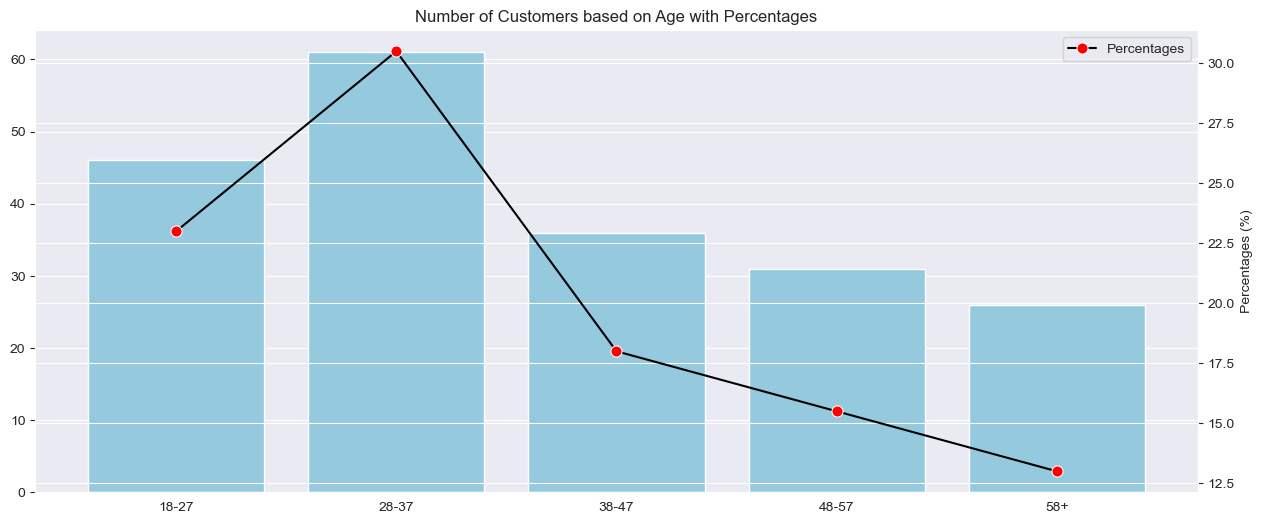

In [22]:

# Call the function to get counts and percentages for each age range
counts = range_of_age(df)

# Define labels for age ranges
age_ranges = ["18-27", "28-37", "38-47", "48-57", "58+"]

# Plotting
plt.figure(figsize=(15,6))

# Plotting counts
sns.barplot(x=age_ranges, y=[count[0] for count in counts], color='skyblue', label='Counts')

# Plotting percentages
ax2 = plt.twinx()
sns.lineplot(x=age_ranges, y=[count[1] for count in counts], color='black', marker='o', markerfacecolor= 'red',markersize=8, ax=ax2, label='Percentages')

# Adding legend
plt.legend(loc='upper right')

# Setting labels and title
plt.title("Number of Customers based on Age with Percentages")
plt.xlabel("Age")
plt.ylabel("Counts")
ax2.set_ylabel("Percentages (%)")

plt.show()

From the chart, I've noted that number of customers is significantly higher from 28 to 37 compared to other age ranges, it's almost 31%
of total customer. Additionally,The range from 18 to 27 has also substantial number of customer but there is a dramatically decrease in the percentage of customers after the age of 37.

### Let's see how strongly consist of cluster among the Age, Annual Income (k$), Spending Score (1-100) with respect to Gender

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


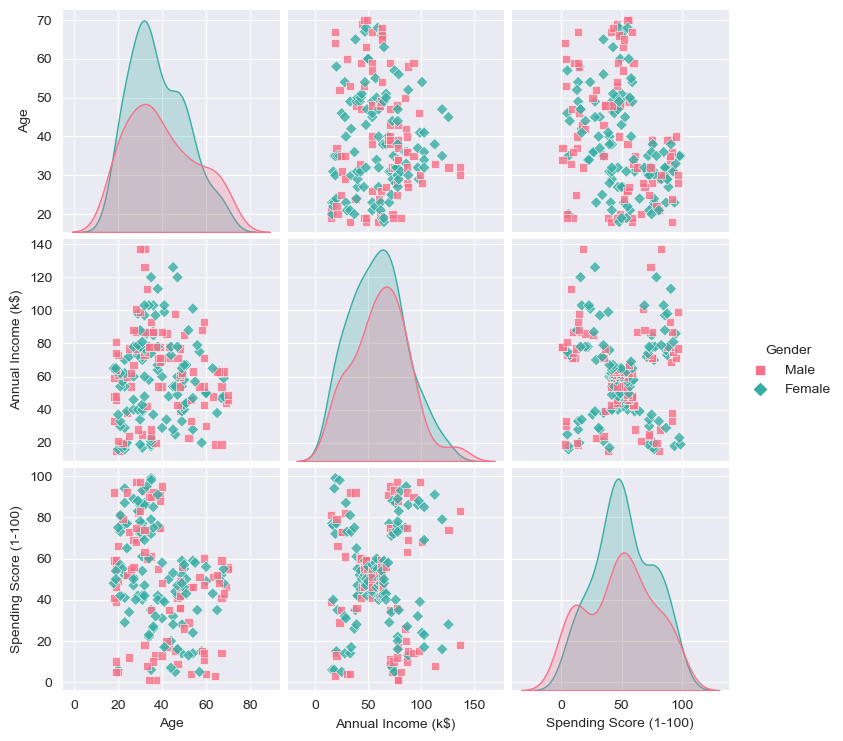

In [23]:
sns.pairplot(df, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "husl",
               height = 2.5,
               markers=["s", "D"],
               plot_kws={"s": 35, "alpha": 0.8});



The above figure illustrates the presence of distinct clusters between Spending Score (1-100) and Annual Income (k$).

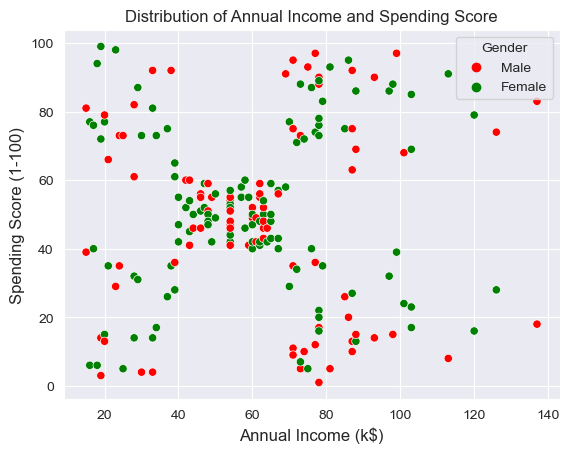

In [24]:

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette=['red', 'green'])
plt.title('Distribution of Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.show()



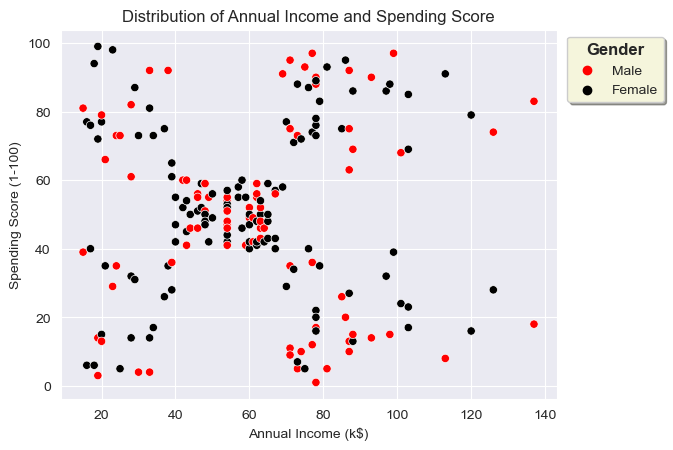

In [25]:
# Scatter plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette=['red', 'black'])

# Title and axis labels
plt.title('Distribution of Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Move legend outside the graph
legends= plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.23, 1), draggable =True,shadow= True, facecolor='#F5F5DC', title_fontsize= 'large')
# using draggable =True, I can drag and drop this graph at anywhere 
legends.get_title().set_fontweight('bold')

# Display plot
plt.show()

### Standardizing the data using MinMaxScaler.

In [25]:
# Ignore FutureWarning about n_init
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Ignore UserWarning about the memory leak
warnings.filterwarnings("ignore", category=UserWarning)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_feature =["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scaler.fit(df[scaled_feature])
new_df = pd.DataFrame(scaler.transform(df[scaled_feature]), columns = scaled_feature)

In [27]:
new_df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020


In [28]:
# Choose the Annual Income Column & Spending Score column
#X = data.iloc[:,[3,4]].values

#print(X)
X= new_df.iloc[:,1:].values

In [29]:
from sklearn.cluster import KMeans

In [30]:
# To choose best number of cluster from 1 to 11
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init= 15,max_iter = 500)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [31]:
kmeans.inertia_

1.6441224008111794

In [32]:
wcss

[23.04072032603991,
 13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.1004341489924965,
 2.624103948396722,
 2.2168818321158827,
 1.8757265705652109,
 1.6441224008111794]

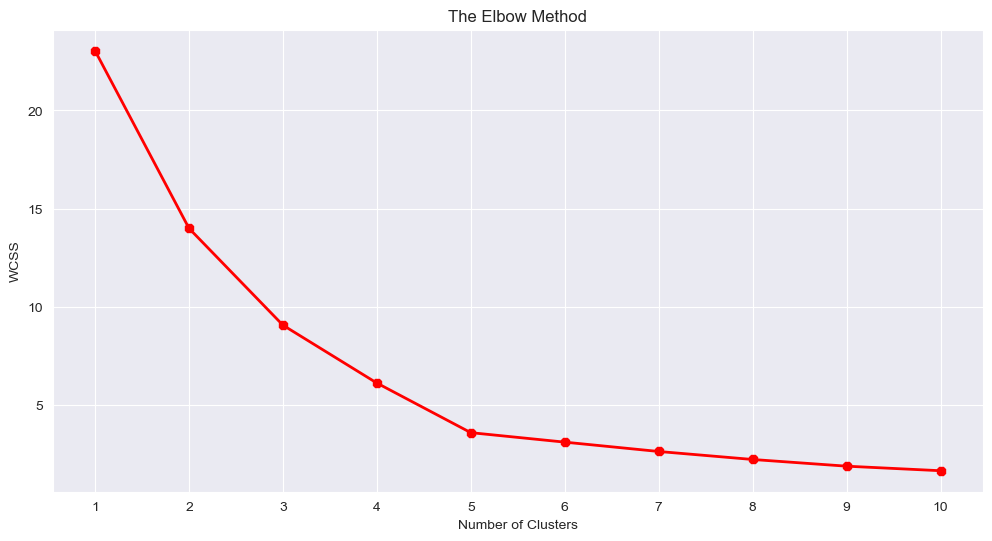

In [33]:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('The Elbow Method', fontsize=12)
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,11, 1))
plt.ylabel("WCSS")
plt.show()

From the figure, k= 5 may be a better choice than k= 6. Science clusters number must be a optimal , So, it's important to 
consider both the wcss value and number of clusters. Because simply choosing the maximum number clusters may not alwayes 
lead to the best solution


In [34]:
# Fit k-Means Clustering Model
k_model = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
clusters = k_model.fit_predict(X)



In [35]:
new_df["label"] = clusters

new_df.tail()

,Age,Annual Income (k$),Spending Score (1-100),label
195,0.326923,0.860656,0.795918,2
196,0.519231,0.909836,0.275510,1
197,0.269231,0.909836,0.744898,2
198,0.269231,1.000000,0.173469,1
199,0.230769,1.000000,0.836735,2


In [36]:
k_model.cluster_centers_.shape

(5, 2)

In [37]:
k_model.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

In [38]:
#X[clusters]
#X[clusters==0]
#X[clusters==0,1]

In [39]:
X[clusters==1,1]

array([0.28571429, 0.10204082, 0.08163265, 0.04081633, 0.06122449,
       0.09183673, 0.04081633, 0.1122449 , 0.35714286, 0.21428571,
       0.16326531, 0.19387755, 0.15306122, 0.        , 0.        ,
       0.34693878, 0.04081633, 0.25510204, 0.19387755, 0.26530612,
       0.12244898, 0.09183673, 0.12244898, 0.14285714, 0.13265306,
       0.31632653, 0.14285714, 0.3877551 , 0.23469388, 0.16326531,
       0.2244898 , 0.07142857, 0.15306122, 0.2755102 , 0.17346939])

In [40]:
centroids = kmeans.cluster_centers_

In [41]:
centroids

array([[0.53688525, 0.91709184],
       [0.13056206, 0.34766764],
       [0.77622951, 0.21428571],
       [0.26941329, 0.5424275 ],
       [0.08155738, 0.81632653],
       [0.07855191, 0.08758503],
       [0.514637  , 0.73760933],
       [0.53064861, 0.12644188],
       [0.39120715, 0.45941558],
       [0.7859745 , 0.80952381]])

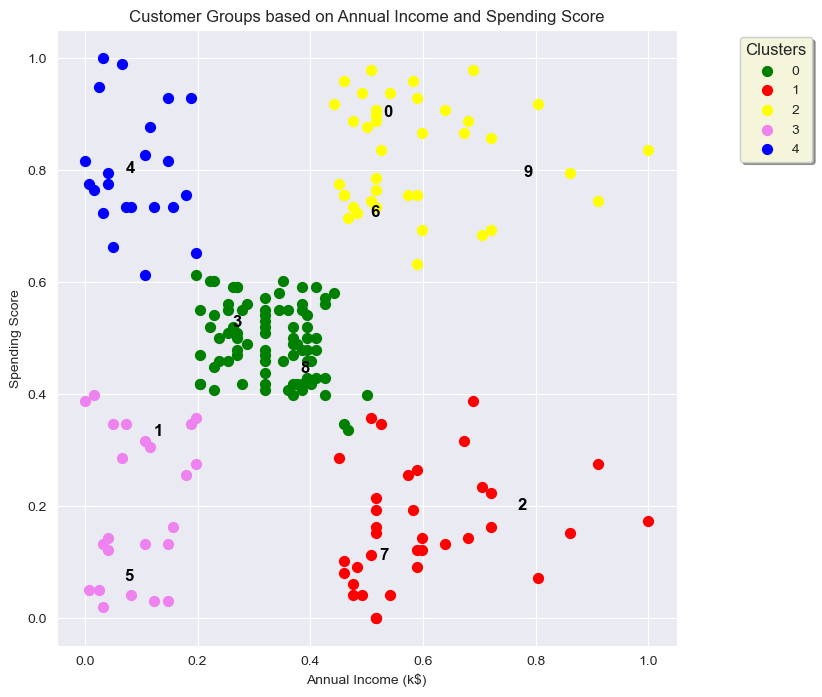

In [42]:
# Visualizing all the Clusters with centroids
plt.figure(figsize=(8,8))
plt.scatter(X[clusters==0,0], X[clusters==0,1], s=50, c='green', label='0')
plt.scatter(X[clusters==1,0], X[clusters==1,1], s=50, c='red', label='1')
plt.scatter(X[clusters==2,0], X[clusters==2,1], s=50, c='yellow', label='2')
plt.scatter(X[clusters==3,0], X[clusters==3,1], s=50, c='violet', label='3')
plt.scatter(X[clusters==4,0], X[clusters==4,1], s=50, c='blue', label='4')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i, 0], centroids[i, 1]), fontsize=12, fontweight='bold', color='black', ha='center', va='top')


    
plt.title('Customer Groups based on Annual Income and Spending Score', fontsize=12)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
#plt.legend()
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.23, 1), draggable =True,shadow= True, facecolor='#F5F5DC', title_fontsize= 'large')
plt.show()

In [43]:
# To check the total number of customers in each group with customer id

for label in sorted(new_df['label'].unique()):
    
    
    if label == 0:
        add_suffix = "st"
    elif label == 1:
        add_suffix = "nd"
    elif label == 2:
        add_suffix = "rd"
    else:
        add_suffix= 'th'
    
    customer_group = new_df[new_df["label"] == label]
    print(f'Number of customers in {label+1}{add_suffix} group:', len(customer_group))
    print('\nTheir index values are:', customer_group.index.tolist())
    print("--------------------------------------------")
    
    
    


Number of customers in 1st group: 81

Their index values are: [43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 126, 132, 142]
--------------------------------------------
Number of customers in 2nd group: 35

Their index values are: [124, 128, 130, 134, 136, 138, 140, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]
--------------------------------------------
Number of customers in 3rd group: 39

Their index values are: [123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]
-